In [1]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import random

##################################################### Preprocessing Data ###########################################################################
df = pd.read_csv('/content/vgames2.csv')
df1 = pd.read_csv('/content/vgames2.csv')
# Country: ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
country = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# Genre: ['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']
genre = ['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']



# 불필요한 열 삭제 (drop -> 'Unnamed: 0')
df.drop('Unnamed: 0', axis=1, inplace=True)

# 각 열별 결측치 확인 및 제거 ('Year', 'Genre', 'Publisher' 열에서만 결측치 확인됨)
df.isna().sum()
df.dropna(subset=['Year', 'Genre', 'Publisher'], inplace=True)


# 'Year' 열에서 간혹 1~2 자리수의 값이 존재하는 것을 확인.
# 대다수의 연도가 1980~2020 년 안에 분포하는 것으로 보아
# 두 자리 수 중에서 80~99 인 값은 1980~1999 으로, 그 외의 값은 2000~2020 일 것으로 판단하여 값을 각각에 맞춰 변경.
def devised_year(y):
  if y < 80:
    y += 2000
  elif y < 100 and y >= 80:
    y += 1900
  else:
    y

  return int(y)

df['Year'] = df['Year'].apply(devised_year)



# Country 열들의 값 중 매우 큰 값은 뒤에 'K'와 'N'로 표현되어있다.
# 숫자와 문자가 같이 있으므로 데이터 타입은 object이며 실제 데이터 활용시 문제가 되므로
# 'K'와 'M'를 지우고 'K'를 지운 데이터에는 1000(천)을 곱하고, 'M'를 지운 데이터에는 1000000(백만)을 곱한 값을 반환.
def devised_Sales_value(df_Sales_value):
  if ('K' in df_Sales_value) == True:
    df_Sales_value = df_Sales_value.strip('K')
    return float(df_Sales_value) * 1000
  
  elif ('M' in df_Sales_value) == True:
    df_Sales_value = df_Sales_value.strip('M')
    return float(df_Sales_value) * 1000000

  else:
    return float(df_Sales_value)

for i in country:
  df[i] = df[i].apply(devised_Sales_value)


# 불필요한 데이터 제거 후 인덱스 정렬
df.reset_index(drop=True, inplace=True)

df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


Genre
Action     28.78
Shooter    16.66
Racing     16.02
Name: NA_Sales, dtype: float64 
 Genre
Platform    22.20
Action      20.48
Shooter     17.83
Name: EU_Sales, dtype: float64 
 Genre
Role-Playing    59.02
Sports           7.26
Action           7.21
Name: JP_Sales, dtype: float64 
 Genre
Role-Playing    21.80
Action          18.04
Sports          15.61
Name: Other_Sales, dtype: float64 



Genre
Role-Playing    26.230708
Action           8.892122
Platform         8.302953
Shooter          8.043952
Racing           6.202459
Sports           3.915733
Misc             2.541686
Fighting         2.357895
Strategy         2.281717
Simulation       2.279517
Adventure        1.578913
Puzzle           0.549811
Name: All_Sales_Std, dtype: float64

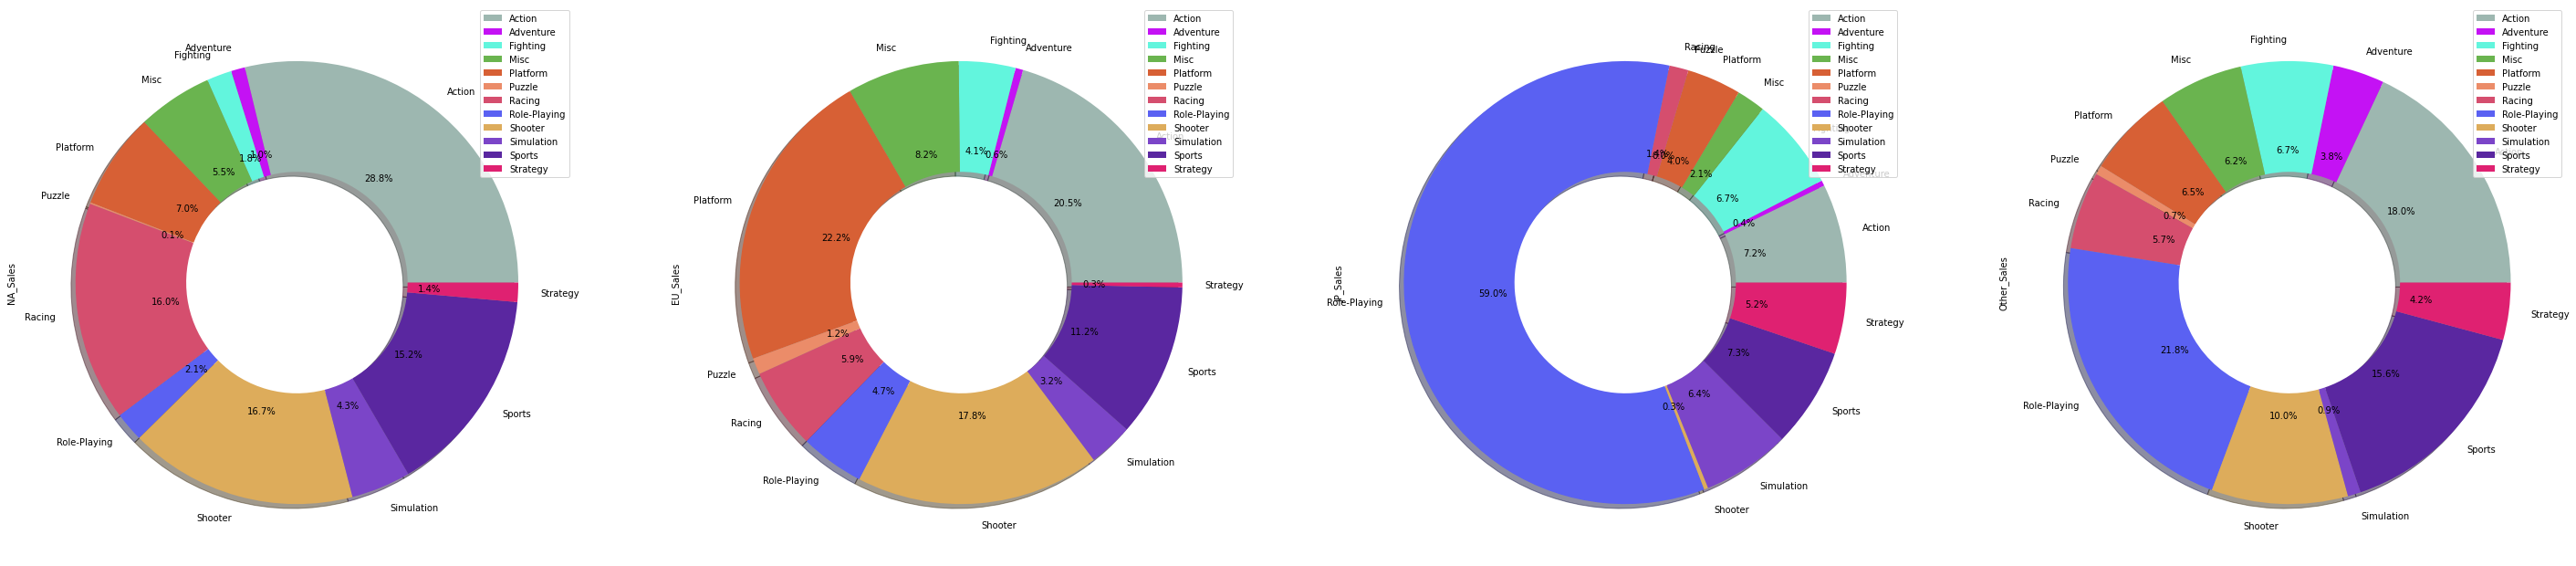

In [77]:
##################################################### Analyzing Data ###########################################################################

# 1. 지역에 따라서 선호하는 게임 장르가 다를까?
## * 분석방법
##  '선호한다'의 기준은 판매량이 많을수록 해당 게임 장르를 선호한다고 판단하였다.
##  지역별 판매량 데이터를 게임 장르에 따라 그룹핑한 후 전체 판매량에서 각 장르의 판매량의 비율을 구한다.
##  위에서 구한 비율을 토대로 각 지역별 pie chart로 시각화하여 지역별로 선호하는 게임 장르의 순위를 확인한다.

# 1-(1) 게임 장르별로 그룹화하여 pie chart로 시각화한다.
# Analysis_1: 필요한 데이터만 추출. (Genre와 Country 별 Sales)
Analysis_1 = df[['Genre','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].copy()
Analysis_1 = Analysis_1.groupby(Analysis_1['Genre']).sum()

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(12)]
Analysis_1.plot.pie(subplots=True,
                    figsize=(50,50),
                    autopct='%.1f%%',
                    colors=color,
                    shadow=True,
                    wedgeprops=dict(width=0.5))

# 1-(2) 각 나라별로 판매량이 가장 높은 순서대로 정렬한 후 TOP3의 장르만 출력.
NA = Analysis_1.apply(lambda x: round(x / x.sum() * 100,2))['NA_Sales'].sort_values(ascending=False)
EU = Analysis_1.apply(lambda x: round(x / x.sum() * 100,2))['EU_Sales'].sort_values(ascending=False)
JP = Analysis_1.apply(lambda x: round(x / x.sum() * 100,2))['JP_Sales'].sort_values(ascending=False)
Ot = Analysis_1.apply(lambda x: round(x / x.sum() * 100,2))['Other_Sales'].sort_values(ascending=False)

print(NA[:3],'\n',
      EU[:3],'\n',
      JP[:3],'\n',
      Ot[:3],'\n')

prop_country = pd.concat([NA.sort_index(),EU.sort_index(),JP.sort_index(),Ot.sort_index()], axis=1)
prop_country['All_Sales_Std'] = prop_country.std(axis=1)
prop_std = prop_country['All_Sales_Std'].copy()
prop_std.sort_values(ascending=False)

All_Sales
Year  Platform           
1980s NES         86.5729
      2600        13.4190
      GB           0.0081
1990s N64         48.9960
      PS          31.4579
      GB          12.0278
2000s PS2         21.8961
      GBA         15.7215
      PS          11.7167
2010s X360        49.2636
      PS3         13.8252
      PS4          9.2038

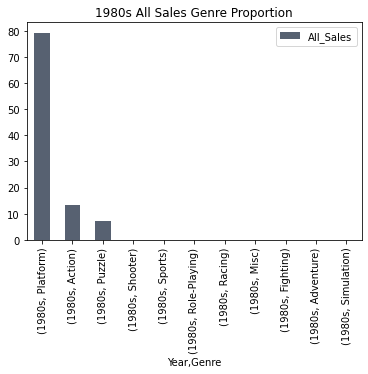

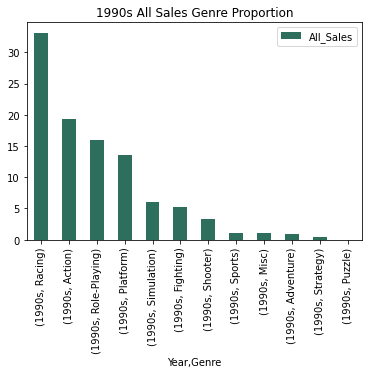

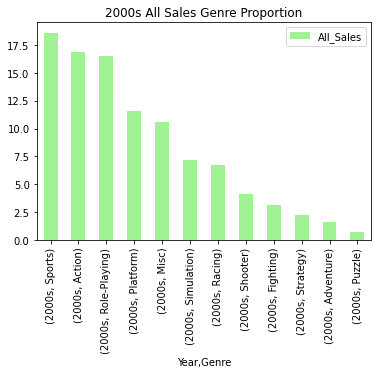

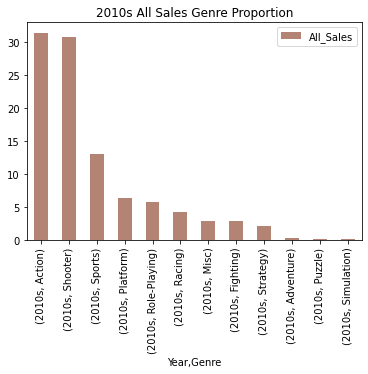

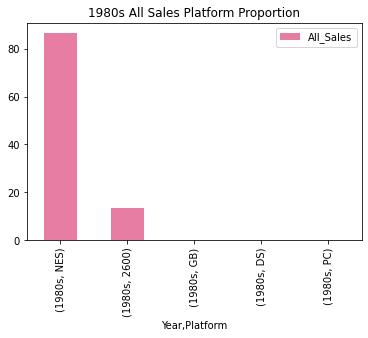

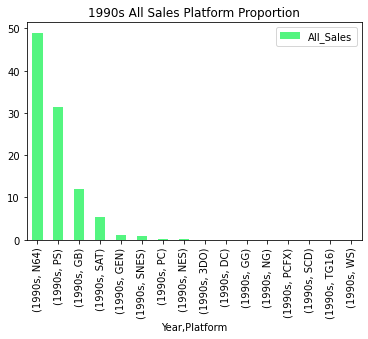

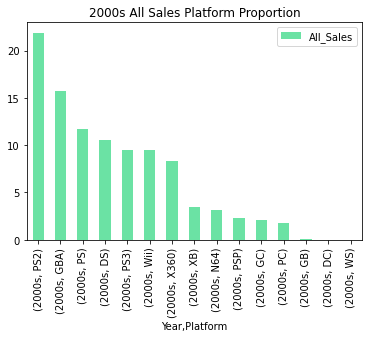

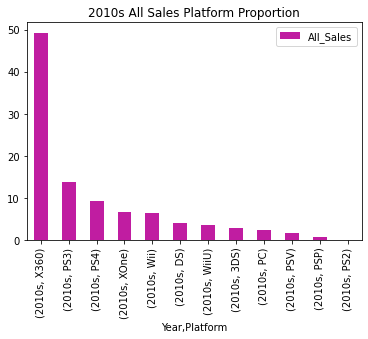

In [79]:
# 2. 연도별 게임의 트렌드
## * 분석방법
##  게임 트렌드의 기준을 'Genre'와 'Platform' 두 가지로 나누어 분석하였다.
##  연도는 10년 단위로 카테고리화하여 총 4개로 분석을 진행하였다.
### 2-(1) 'Year' 열의 최솟값은 1980이고, 최댓값은 2020이므로 단위년도(10년) 별로 데이터를 분류
###     // 1980년대(1980~1989), 1990년대(1990~1999), 2000년대(2000~2009), 2010년대(2010~2019)
###     // 편의상 2020년대는 2020년 데이터 하나이므로 분석에서 제외하였다.

def categorized_year(y):
  if (y >= 1980) & (y < 1990):
    return '1980s'
  elif (y >= 1990) & (y < 2000):
    return '1990s'
  elif (y >= 2000) & (y < 2010):
    return '2000s'
  elif (y >= 2010) & (y < 2020):
    return '2010s'
  else:
    return '2020s'


Analysis_2 = df[['Year','Genre','Platform','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].copy()
Analysis_2.drop(Analysis_2[Analysis_2['Year']==2020].index, inplace=True)
Analysis_2['All_Sales'] = Analysis_2[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
Analysis_2['Year'] = Analysis_2['Year'].apply(categorized_year)

### 2-(2) 'Genre' 트렌드 분석
### 각 카테고리화된 연도별로 그룹핑한 후 장르별로 판매량의 합계를 구하고 합계가 큰 순서대로 정렬한다.
### 각 연도별로 상위 3개씩 추출하여 트렌드를 확인한다.
Y = Analysis_2[['Year','Genre','All_Sales']].copy()
Y = Y.groupby(['Year','Genre']).sum()
Y = Y.groupby(level=0).apply(lambda x: round(x / x.sum() * 100,4))
Y = Y.groupby(level=0).apply(lambda x : x.sort_values(by='All_Sales', ascending=False))

Y1 = Y.loc['1980s'].head(3)
Y2 = Y.loc['1990s'].head(3)
Y3 = Y.loc['2000s'].head(3)
Y4 = Y.loc['2010s'].head(3)

res_genre = pd.concat([Y1,Y2,Y3,Y4])
res_genre

### 2-(3) 'Platform' 트렌드 분석
### 각 카테고리화된 연도별로 그룹핑한 후 플랫폼별로 판매량의 합계를 구하고 합계가 큰 순서대로 정렬한다.
### 각 연도별로 상위 3개씩 추출하여 트렌드를 확인한다.
Z = Analysis_2[['Year','Platform','All_Sales']].copy()
Z = Z.groupby(['Year','Platform']).sum()
Z = Z.groupby(level=0).apply(lambda x: round(x / x.sum() * 100,4))
Z = Z.groupby(level=0).apply(lambda x : x.sort_values(by='All_Sales', ascending=False))

Z1 = Z.loc['1980s'].head(3)
Z2 = Z.loc['1990s'].head(3)
Z3 = Z.loc['2000s'].head(3)
Z4 = Z.loc['2010s'].head(3)

res_platform = pd.concat([Z1,Z2,Z3,Z4])
res_platform

c = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(8)]
Y.loc['1980s'].plot(kind='bar', title='1980s All Sales Genre Proportion', color=c[0])
Y.loc['1990s'].plot(kind='bar', title='1990s All Sales Genre Proportion', color=c[1])
Y.loc['2000s'].plot(kind='bar', title='2000s All Sales Genre Proportion', color=c[2])
Y.loc['2010s'].plot(kind='bar', title='2010s All Sales Genre Proportion', color=c[3])

Z.loc['1980s'].plot(kind='bar', title='1980s All Sales Platform Proportion', color=c[4])
Z.loc['1990s'].plot(kind='bar', title='1990s All Sales Platform Proportion', color=c[5])
Z.loc['2000s'].plot(kind='bar', title='2000s All Sales Platform Proportion', color=c[6])
Z.loc['2010s'].plot(kind='bar', title='2010s All Sales Platform Proportion', color=c[7])
res_platform

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
10695,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630000.0,5.31,0.06,1.38,9630006.75


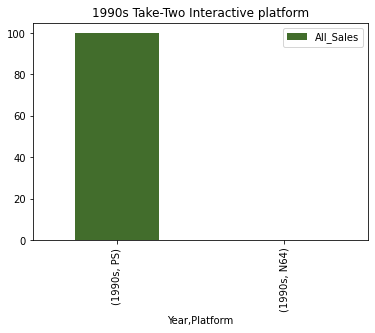

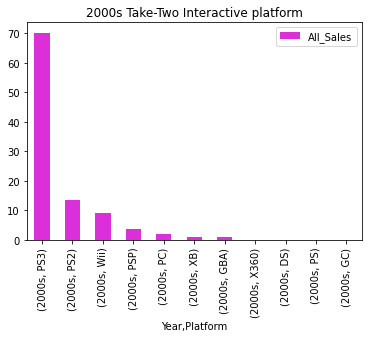

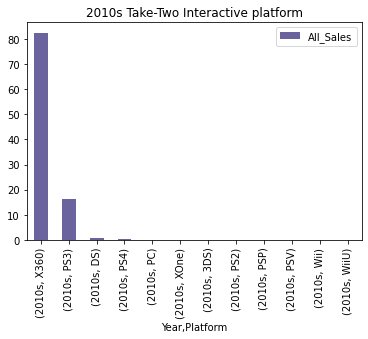

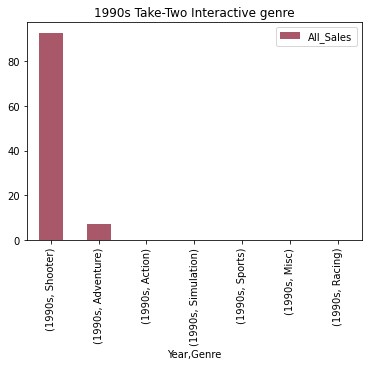

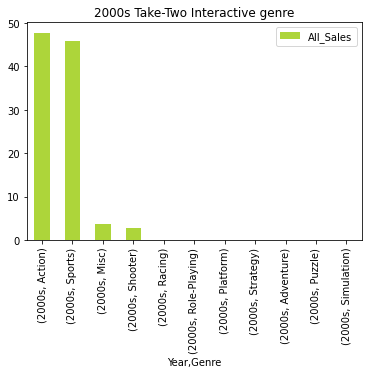

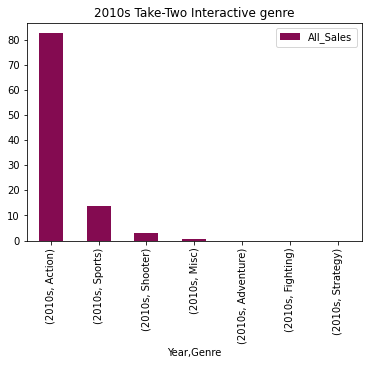

In [82]:
# 3. 출고량이 가장 높은 게임에 대한 분석
## * 분석방법
##  출고량이 가장 높았던 게임을 만든 회사의 판매 전략을 분석.

df['All_Sales'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
Game_max_info = df.iloc[df[df['All_Sales']==df['All_Sales'].max()].index]
Game_max_Publisher = Game_max_info['Publisher'].tolist()[0]

Analysis_3 = df[df['Publisher']==Game_max_Publisher]
Analysis_3 = Analysis_3[['Year','Platform','Genre','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','All_Sales']]
Analysis_3.reset_index(inplace=True, drop=True)
Analysis_3['Year'] = Analysis_3['Year'].apply(categorized_year)

### Game_max_data_pf : 연도별 platform 차지하는 비율
Game_max_data_pf = Analysis_3[['Year','Platform','All_Sales']].copy()
Game_max_data_pf = Game_max_data_pf.groupby(['Year', 'Platform']).sum()
Game_max_data_pf = Game_max_data_pf.groupby(level=0).apply(lambda x: round(x / x.sum() * 100,4))
Game_max_data_pf = Game_max_data_pf.groupby(level=0).apply(lambda x : x.sort_values(by='All_Sales', ascending=False))

### Game_max_data_gr : 연도별 genre 차지하는 비율
Game_max_data_gr = Analysis_3[['Year','Genre','All_Sales']].copy()
Game_max_data_gr = Game_max_data_gr.groupby(['Year', 'Genre']).sum()
Game_max_data_gr = Game_max_data_gr.groupby(level=0).apply(lambda x: round(x / x.sum() * 100,4))
Game_max_data_gr = Game_max_data_gr.groupby(level=0).apply(lambda x : x.sort_values(by='All_Sales', ascending=False))

Gpf1 = Game_max_data_pf.loc['1990s']
Gpf2 = Game_max_data_pf.loc['2000s']
Gpf3 = Game_max_data_pf.loc['2010s']

Ggr1 = Game_max_data_gr.loc['1990s']
Ggr2 = Game_max_data_gr.loc['2000s']
Ggr3 = Game_max_data_gr.loc['2010s']

### Gpf: 연도별 platform 차지하는 비율 TOP3
### Ggr: 연도별 genre 차지하는 비율 TOP3
Gpf = pd.concat([Gpf1.head(3), Gpf2.head(3), Gpf3.head(3)])
Ggr = pd.concat([Ggr1.head(3), Ggr2.head(3), Ggr3.head(3)])

c = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(6)]

Gpf1.plot(kind='bar', title='1990s Take-Two Interactive platform', color=c[0])
Gpf2.plot(kind='bar', title='2000s Take-Two Interactive platform', color=c[1])
Gpf3.plot(kind='bar', title='2010s Take-Two Interactive platform', color=c[2])

Ggr1.plot(kind='bar', title='1990s Take-Two Interactive genre', color=c[3])
Ggr2.plot(kind='bar', title='2000s Take-Two Interactive genre', color=c[4])
Ggr3.plot(kind='bar', title='2010s Take-Two Interactive genre', color=c[5])



Game_max_info